In [1]:
import keras, os
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from glob import glob
from IPython.display import display, Markdown, Latex
from sklearn.metrics import classification_report, confusion_matrix

model_name = "modelv1_1"

json_file = open(model_name+'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights(model_name+".h5")
model.compile(
    optimizer = tf.optimizers.SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [9]:
from PIL import Image
img = Image.open("banana.jpg")
img = img.resize((224,224))
img = np.expand_dims(img, axis=0)
model.predict(img)

1/1 [==============================] - 0s 129ms/step


array([[0.00303249, 0.0054247 , 0.00205924, 0.00254001, 0.00117788,
        0.01305413, 0.94518155, 0.0015809 , 0.00415287, 0.00625847,
        0.00261233, 0.00169835, 0.00449634, 0.00475948, 0.00197128]],
      dtype=float32)

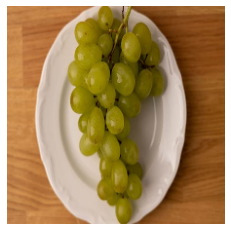

(-0.5, 223.5, 223.5, -0.5)

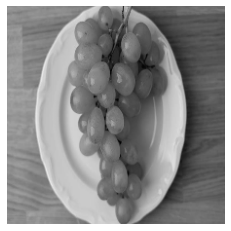

In [21]:
img = cv2.resize(plt.imread("grape.jpg"),(224,224))
plt.imshow(img)
plt.axis('off')
plt.show()
img = tf.image.rgb_to_grayscale(img)
img = tf.image.grayscale_to_rgb(img)
plt.imshow(img)
plt.axis('off')

In [12]:
val_img_paths = ["banana.jpg"]
val_labels = ["banana"]

valImgPath = pd.Series(val_img_paths).astype(str)
valLabels=pd.Series(val_labels)
valData = pd.concat([valImgPath,valLabels],axis=1)

train_gen = ImageDataGenerator()
aug_gen = ImageDataGenerator(
          rotation_range=10, # rotation
          width_shift_range=0.2, # horizontal shift
          height_shift_range=0.2, # vertical shift
          zoom_range=0.2, # zoom
          horizontal_flip=True, # horizontal flip
          brightness_range=[0.2,1.2]) # brightness


train_data = train_gen.flow_from_dataframe(
    dataframe = valData,
    x_col = 0,
    y_col = 1,
    target_size = (224,224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    shuffle = True
)

aug_data = aug_gen.flow_from_dataframe(
    dataframe = valData,
    x_col = 0,
    y_col = 1,
    target_size = (224,224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    shuffle = True
)



Found 1 validated image filenames belonging to 1 classes.
Found 1 validated image filenames belonging to 1 classes.


(-0.5, 223.5, 223.5, -0.5)

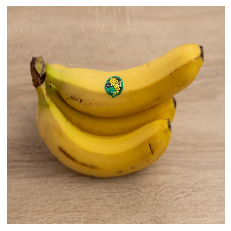

In [20]:
img = next(train_data)[0].astype('uint8')

plt.imshow(img[0])
plt.axis('off')

(-0.5, 223.5, 223.5, -0.5)

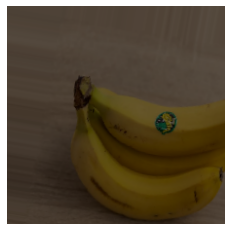

In [19]:
img = next(aug_data)[0].astype('uint8')

plt.imshow(img[0])
plt.axis('off')